<a href="https://colab.research.google.com/github/Soniyaraghuvanshi/Weather-Data-Analysis/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('GHCND_sample_csv.csv', parse_dates=['DATE'])


In [ ]:
crop_df = pd.read_csv("crop_yield.csv")

In [ ]:
df['TEMP'] = (df['TMAX'] + df['TMIN']) / 2

In [ ]:
df.head()


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,TMAX,TMIN,PRCP,TEMP
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-01,-178,-311,0,-244.5
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-02,-244,-322,0,-283.0
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-03,-194,-289,0,-241.5
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-04,-167,-200,15,-183.5
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-05,-133,-167,9999,-150.0


In [ ]:
crop_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
print(df.columns)
print(crop_df.columns)


Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'TMAX', 'TMIN', 'PRCP', 'TEMP'],
      dtype='object')
Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')


In [ ]:
# Convert DATE to datetime and extract Year
df['DATE'] = pd.to_datetime(df['DATE'])
df['Year'] = df['DATE'].dt.year

# Aggregate yearly data
weather_yearly = df.groupby('Year').agg({
    'TMAX': 'mean',
    'TMIN': 'mean',
    'PRCP': 'sum'
}).reset_index()

# Calculate average temperature
weather_yearly['TEMP'] = (weather_yearly['TMAX'] + weather_yearly['TMIN']) / 2


In [ ]:
# Rename Crop_Year to Year to match weather data
crop_df.rename(columns={'Crop_Year': 'Year'}, inplace=True)

# Optionally, average yield across crops per year
crop_yearly = crop_df.groupby('Year').agg({
    'Yield': 'mean',
    'Annual_Rainfall': 'mean'
}).reset_index()


In [ ]:
merged_df = pd.merge(weather_yearly, crop_yearly, on='Year', how='inner')


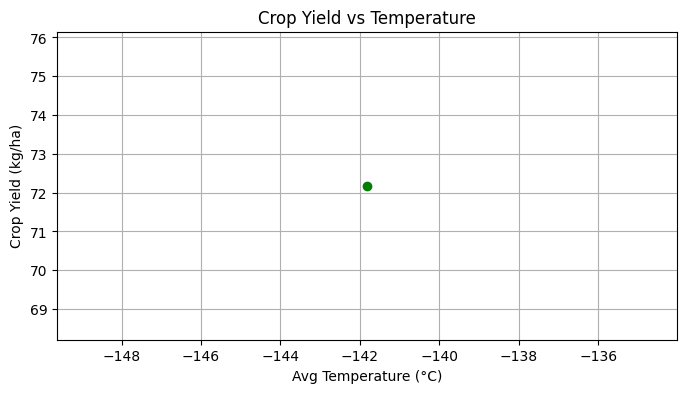

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(merged_df['TEMP'], merged_df['Yield'], color='green')
plt.title('Crop Yield vs Temperature')
plt.xlabel('Avg Temperature (°C)')
plt.ylabel('Crop Yield (kg/ha)')
plt.grid(True)
plt.show()


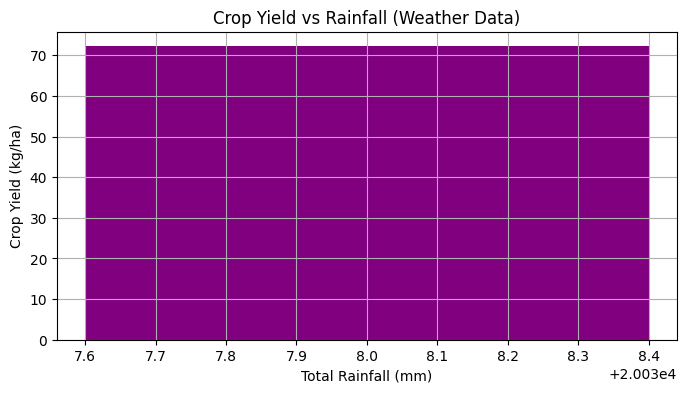

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(merged_df['PRCP'], merged_df['Yield'], color='purple')
plt.title('Crop Yield vs Rainfall (Weather Data)')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Crop Yield (kg/ha)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


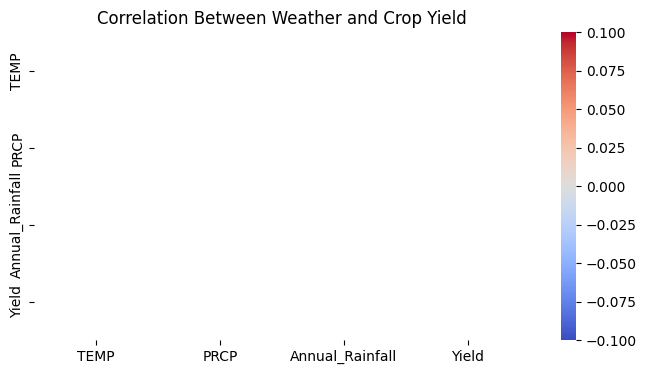

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(merged_df[['TEMP', 'PRCP', 'Annual_Rainfall', 'Yield']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather and Crop Yield")
plt.show()


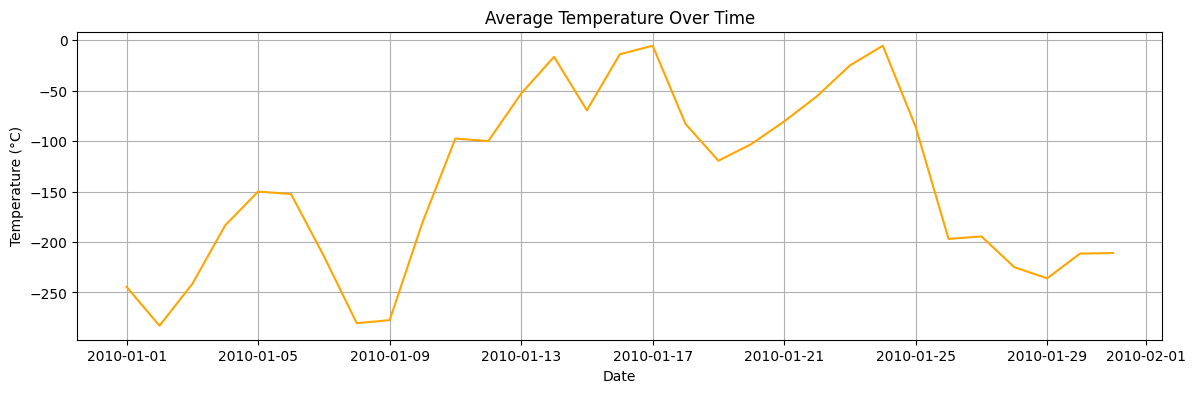

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(df['DATE'], df['TEMP'], color='orange')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

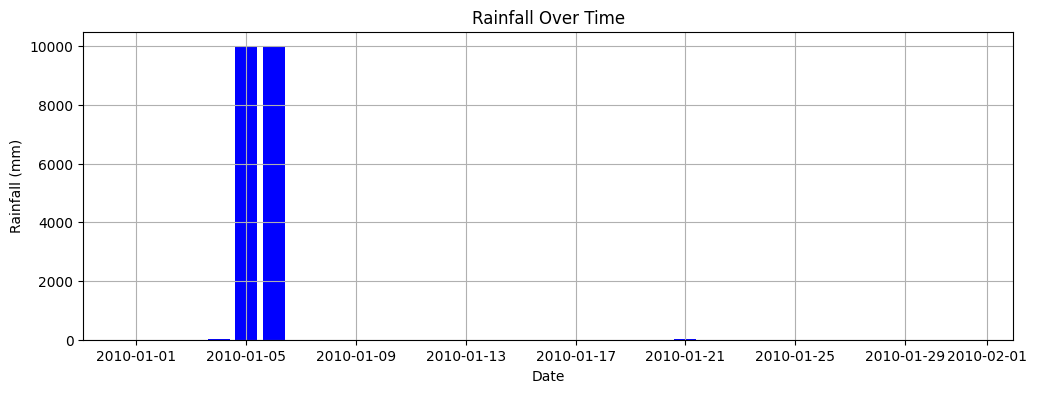

In [ ]:
plt.figure(figsize=(12, 4))
plt.bar(df['DATE'], df['PRCP'], color='blue')
plt.title('Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


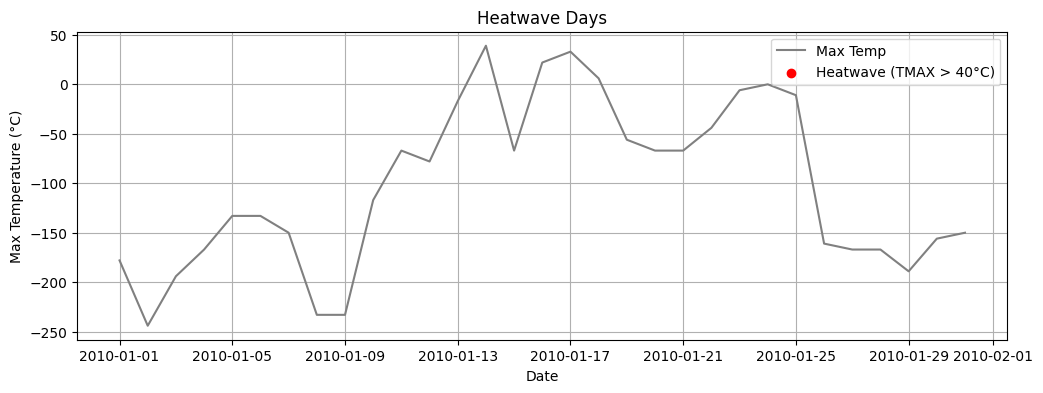

In [ ]:
df['Heatwave'] = df['TMAX'] > 40
heatwaves = df[df['Heatwave']]

plt.figure(figsize=(12, 4))
plt.plot(df['DATE'], df['TMAX'], color='gray', label='Max Temp')
plt.scatter(heatwaves['DATE'], heatwaves['TMAX'], color='red', label='Heatwave (TMAX > 40°C)')
plt.title('Heatwave Days')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

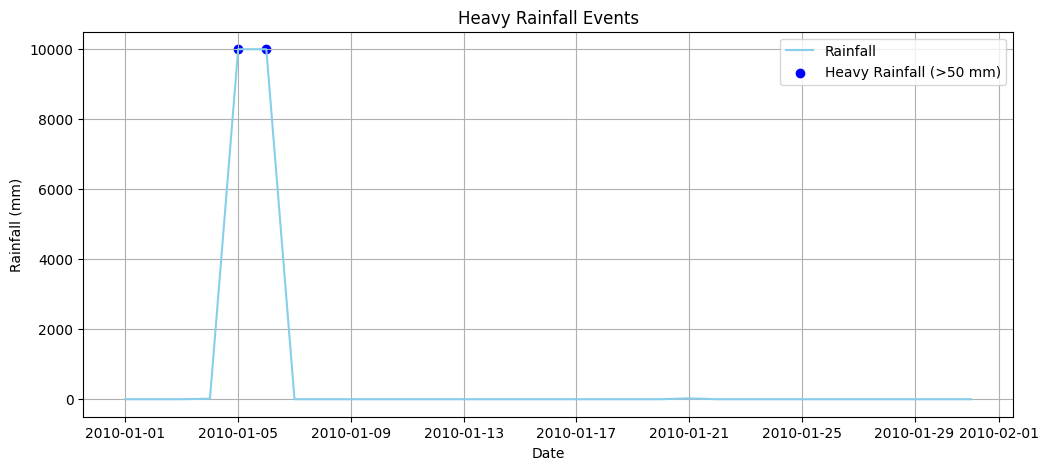

In [ ]:
df['HeavyRain'] = df['PRCP'] > 50
rain_events = df[df['HeavyRain']]

plt.figure(figsize=(12, 5))
plt.plot(df['DATE'], df['PRCP'], color='skyblue', label='Rainfall')
plt.scatter(rain_events['DATE'], rain_events['PRCP'], color='blue', label='Heavy Rainfall (>50 mm)')
plt.title('Heavy Rainfall Events')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

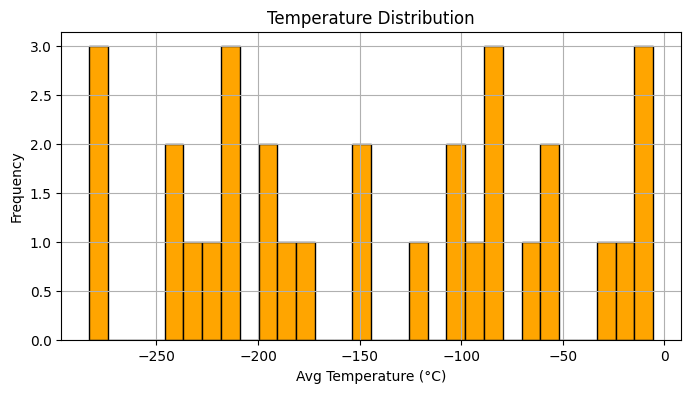

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df['TEMP'], bins=30, color='orange', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Avg Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

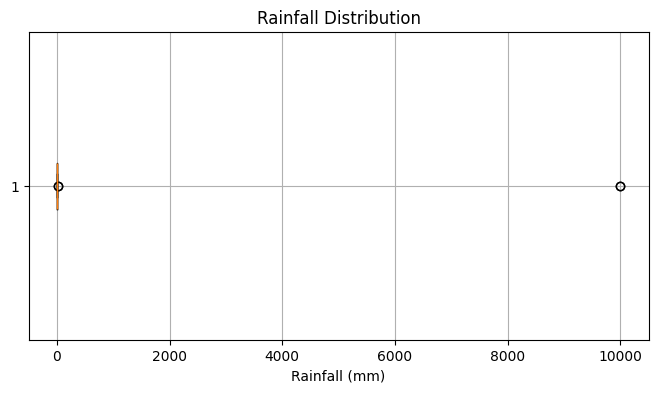

In [ ]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['PRCP'], vert=False)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.grid(True)
plt.show()

NameError: name 'GHCND_sample_csv' is not defined